### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Movie details and rating data are kept in different tsv files. I imported these files seperately and did some visualizations with it.

### Ratings data

In [3]:
rating_data = []

with open('rating.tsv') as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
    movie_id = row[0]
    rating = row[1]
    num_votes = row[2]
    rating_data.append([movie_id,rating,num_votes])

In [4]:
# converting rating_data to a dataframe
rating_df = pd.DataFrame(rating_data, columns=["movie_id","rating","num_votes"])
rating_df.drop(0, inplace=True)

# deleting rating_data to open some space
rating_data = []

# columns are imported as object so I convert them to proper data type
rating_df.rating = rating_df.rating.astype('float')
rating_df.num_votes = rating_df.num_votes.astype('int') 

rating_df.head()

,movie_id,rating,num_votes
1,tt0000001,5.6,1592
2,tt0000002,6.1,194
3,tt0000003,6.5,1267
4,tt0000004,6.2,120
5,tt0000005,6.1,2028


In [5]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020518 entries, 1 to 1020518
Data columns (total 3 columns):
movie_id     1020518 non-null object
rating       1020518 non-null float64
num_votes    1020518 non-null int32
dtypes: float64(1), int32(1), object(1)
memory usage: 27.3+ MB


distplot for rating column

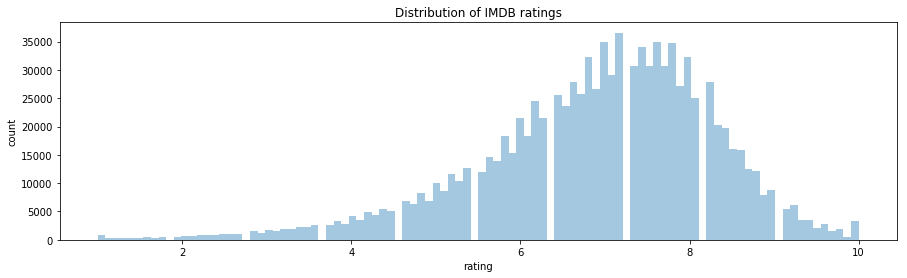

In [6]:
plt.figure(figsize=(15,4));
sns.distplot(rating_df['rating'], kde=False, bins=100);
plt.title('Distribution of IMDB ratings');
plt.ylabel('count');

barplot for rating in a different dataframe

In [7]:
df2 = rating_df.groupby('rating').count()
df2 = df2.reset_index()
df2 = df2.drop('num_votes', axis=1)
df2.rename(columns={"movie_id": "total_count"}, inplace=True)
df2.head()

,rating,total_count
0,1.0,920
1,1.1,241
2,1.2,274
3,1.3,235
4,1.4,316


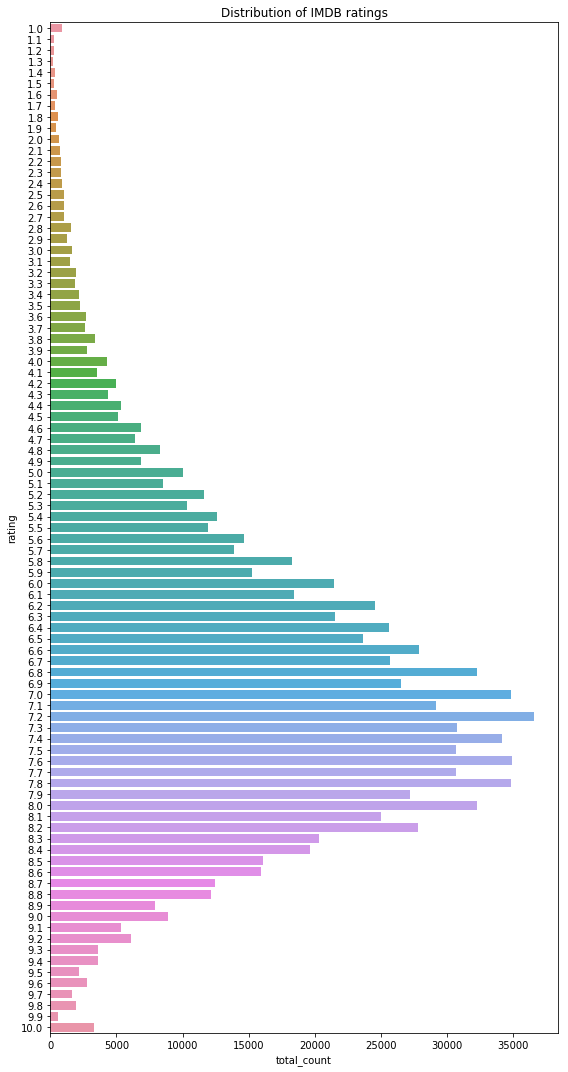

In [8]:
plt.figure(figsize=(8,15));
sns.barplot(x='total_count', y='rating', data=df2, orient='h');
plt.title('Distribution of IMDB ratings');
plt.tight_layout()

### Movie data

Sometimes the code produced an error so I used try for that.

In [9]:
movie_data = []

with open('title.tsv', encoding='utf-8') as tsvfile:
  reader = csv.reader(tsvfile, delimiter='\t')
  for row in reader:
        try:
            movie_id = row[0]
            titleType = row[1]
            primaryTitle = row[2]
            originalTitle = row[3]
            isAdult = row[4]
            startYear = row[5]
            endYear = row[6]
            runtimeMinutes = row[7]
            genres = row[8]
            #print(row)
            #print(genres)
            #genre = genres.split(',')[0]

        except:
            print(primaryTitle)
    
        movie_data.append([movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres])

Rolling in the Deep Dish	Rolling in the Deep Dish
The IMDb Show on Location: Star Wars Galaxy's Edge	The IMDb Show on Location: Star Wars Galaxy's Edge
Die Bauhaus-Stadt Tel Aviv - Vorbild für die Metropolen der Moderne?	Die Bauhaus-Stadt Tel Aviv - Vorbild für die Metropolen der Moderne?
...ein angenehmer Unbequemer...	...ein angenehmer Unbequemer...
GGN Heavyweight Championship Lungs With Mike Tyson and Snoop	GGN Heavyweight Championship Lungs With Mike Tyson and Snoop
No sufras por la alergia esta primavera	No sufras por la alergia esta primavera
I'm Not Going to Come Last, I'm Just Going to Die on The Amazing Race	I'm Not Going to Come Last, I'm Just Going to Die on The Amazing Race
Weight Loss Resolution Restart - Ins & Outs of Menopause, PeriMenopause & Hormones	Weight Loss Resolution Restart - Ins & Outs of Menopause, PeriMenopause & Hormones
Zwischen Vertuschung und Aufklärung - Missbrauchsgipfel im Vatikan	Zwischen Vertuschung und Aufklärung - Missbrauchsgipfel im Vatikan
The 

In [10]:
# converting movie_data to a dataframe
movie_df = pd.DataFrame(movie_data, columns=["movie_id","titleType","primaryTitle","originalTitle","isAdult","startYear","endYear","runtimeMinutes","genres"])
movie_df.drop(0, inplace=True)

# deleting movie data
movie_data = []

movie_df.head()

,movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
2,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
3,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,\N
4,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,\N
5,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


I've checked it out and realized that genres data is wrong for single genre movies in IMDB. That's strange.

### Merging datasets

In [11]:
movie_df = pd.merge(movie_df, rating_df, how='inner', on=['movie_id'])
movie_df.head()

,movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,rating,num_votes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1592
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,194
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,\N,6.5,1267
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,\N,6.2,120
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2028


In [12]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020518 entries, 0 to 1020517
Data columns (total 11 columns):
movie_id          1020518 non-null object
titleType         1020518 non-null object
primaryTitle      1020518 non-null object
originalTitle     1020518 non-null object
isAdult           1020518 non-null object
startYear         1020518 non-null object
endYear           1020518 non-null object
runtimeMinutes    1020518 non-null object
genres            1020518 non-null object
rating            1020518 non-null float64
num_votes         1020518 non-null int32
dtypes: float64(1), int32(1), object(9)
memory usage: 89.5+ MB


Cleaning

In [13]:
# deleting records where start year is null
movie_df = movie_df[movie_df.startYear != '\\N']

# converting start year to integer
movie_df.startYear = movie_df.startYear.astype('int')

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020389 entries, 0 to 1020517
Data columns (total 11 columns):
movie_id          1020389 non-null object
titleType         1020389 non-null object
primaryTitle      1020389 non-null object
originalTitle     1020389 non-null object
isAdult           1020389 non-null object
startYear         1020389 non-null int32
endYear           1020389 non-null object
runtimeMinutes    1020389 non-null object
genres            1020389 non-null object
rating            1020389 non-null float64
num_votes         1020389 non-null int32
dtypes: float64(1), int32(2), object(8)
memory usage: 85.6+ MB


#### Some visualizations

All movies by year

> More movies are done after 2000.

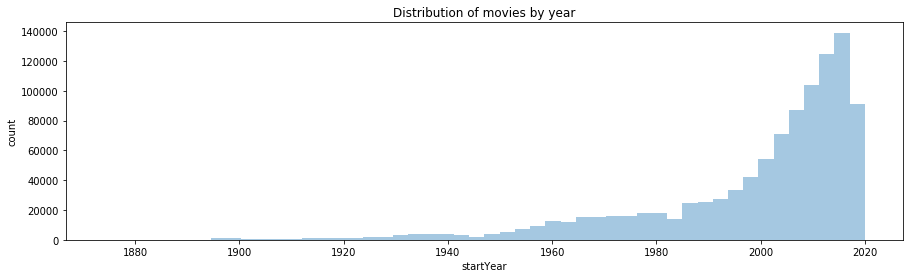

In [14]:
plt.figure(figsize=(15,4));
sns.distplot(movie_df['startYear'], kde=False);
plt.title('Distribution of movies by year');
plt.ylabel('count');

All movies by number of votes

> This didn't show anything. Most movies have very few number of ratings.

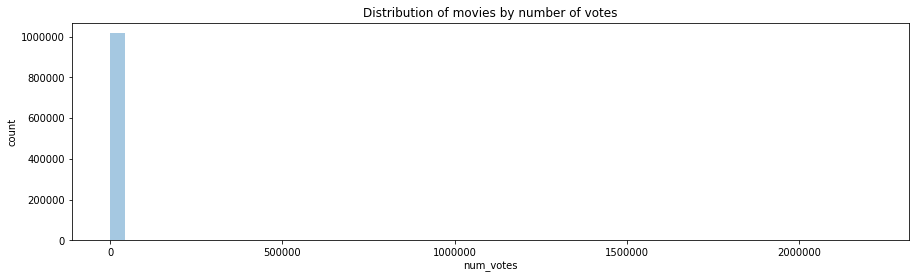

In [15]:
plt.figure(figsize=(15,4));
sns.distplot(movie_df['num_votes'], kde=False);
plt.title('Distribution of movies by number of votes');
plt.ylabel('count');

### Selecting movies

I have created a point where I multiply the movie's rating with its square root of number of votes. Therefore I tried to get the popular movies with high ratings.

In [16]:
# creating point column
movie_df['point'] = movie_df['rating']*np.sqrt(movie_df['num_votes'])

# sorting dataframe
movie_df.sort_values(by=['point'], inplace=True, ascending=False)

movie_df.head(10)

,movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,rating,num_votes,point
80762,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,\N,9.3,2207550,13817.778385
242048,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2187091,13309.935049
530846,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,1936206,12244.990512
414030,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,57,\N,9.3,1651691,11952.186185
80546,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,\N,8.9,1733848,11719.133930
96892,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,\N,8.8,1762094,11681.462210
79683,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,1703690,11486.241927
44910,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1520512,11344.431924
111476,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,\N,8.9,1567633,11143.258497
88504,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1579685,11060.325782


#### Building some visualizations

> If we look at the top rated 5000 movies which have 10k or more votes, we can again see that they are mostly done after 2000.

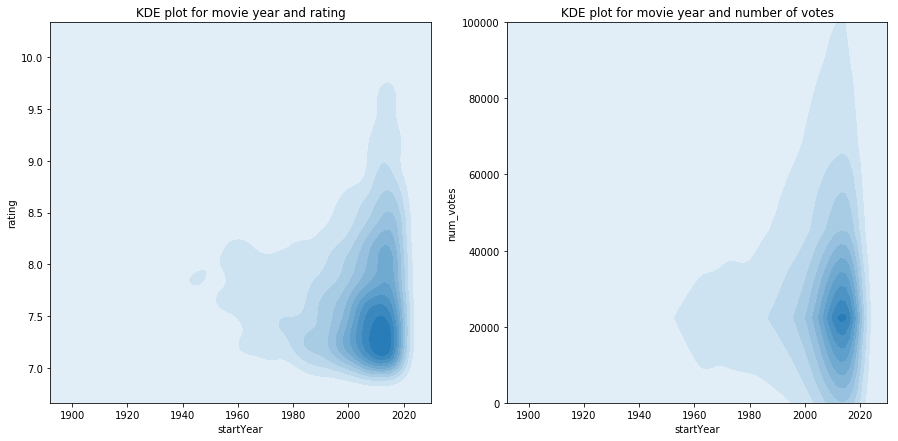

In [17]:
selected_df = movie_df[movie_df['num_votes']>10000].sort_values(by=['rating'], ascending=False).head(5000)

plt.figure(figsize=(15,7));


plt.subplot(1, 2, 1); # 1 row, 2 cols, subplot 1
x = selected_df['startYear']
y = selected_df['rating']
sns.kdeplot(x, y, shade=True);
plt.title('KDE plot for movie year and rating');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
x = selected_df['startYear']
y = selected_df['num_votes']
sns.kdeplot(x, y, shade=True);
plt.ylim(0, 100000);
plt.title('KDE plot for movie year and number of votes');

Text(0.5, 1.0, 'If we choose top 250 movies')

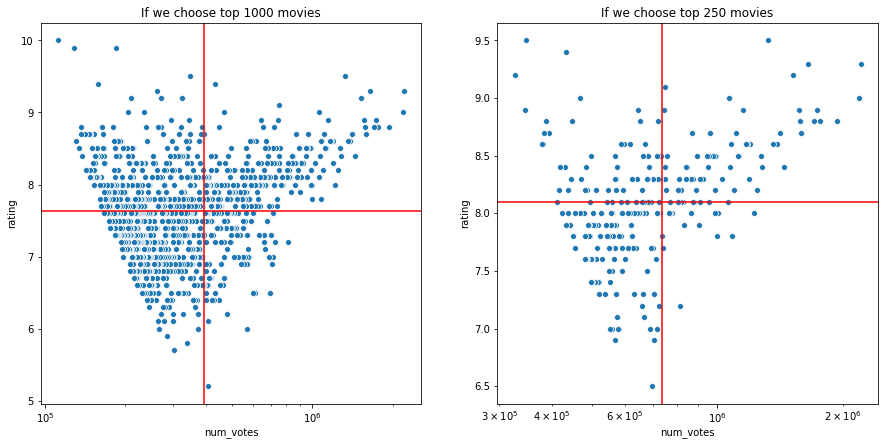

In [18]:
plt.figure(figsize=(15,7));

plt.subplot(1, 2, 1); # 1 row, 2 cols, subplot 1
selected_df = movie_df.head(1000)

sns.scatterplot(x="num_votes", y="rating", data=selected_df)
plt.axvline(x=selected_df['num_votes'].mean(), color='red')
plt.axhline(y=selected_df['rating'].mean(), color='red')
plt.xscale('log')
plt.title('If we choose top 1000 movies')



plt.subplot(1, 2, 2); # 1 row, 2 cols, subplot 2
selected_df = movie_df.head(250)

sns.scatterplot(x="num_votes", y="rating", data=selected_df)
plt.axvline(x=selected_df['num_votes'].mean(), color='red')
plt.axhline(y=selected_df['rating'].mean(), color='red')
plt.xscale('log')
plt.title('If we choose top 250 movies')

### Exporting data

In [25]:
selected_df = movie_df.head(500)
selected_df.reset_index(drop=True, inplace=True)
selected_df.reset_index(drop=False, inplace=True)
selected_df.rename(columns={"index": "rank"}, inplace=True)


print(selected_df.head())
selected_df.to_excel('data.xlsx',sheet_name='Sheet1', index=False)

   rank   movie_id titleType              primaryTitle  \
0     0  tt0111161     movie  The Shawshank Redemption   
1     1  tt0468569     movie           The Dark Knight   
2     2  tt1375666     movie                 Inception   
3     3  tt0944947  tvSeries           Game of Thrones   
4     4  tt0110912     movie              Pulp Fiction   

              originalTitle isAdult  startYear endYear runtimeMinutes  \
0  The Shawshank Redemption       0       1994      \N            142   
1           The Dark Knight       0       2008      \N            152   
2                 Inception       0       2010      \N            148   
3           Game of Thrones       0       2011    2019             57   
4              Pulp Fiction       0       1994      \N            154   

                    genres  rating  num_votes         point  
0                       \N     9.3    2207550  13817.778385  
1       Action,Crime,Drama     9.0    2187091  13309.935049  
2  Action,Adventure,Sci-Fi